In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io
import requests

In [2]:
def get_web_data(url):
    header = {
      "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
      "X-Requested-With": "XMLHttpRequest"
    }

    s=requests.get(url,headers=header).text

    data = pd.read_csv(io.StringIO(s))
    return data    

In [3]:
def get_local_data(filename):
    return pd.read_csv(filename)

In [4]:
url = "https://radwatch.berkeley.edu/test/tmp/dosenet/etch_roof.csv"
data = get_web_data(url)

url = "https://radwatch.berkeley.edu/test/tmp/dosenet/etch_roof_weather.csv"
data_w = get_web_data(url)


In [26]:
filename = r"C:/Users/ahanks/Downloads/etch_roof_d3s.csv"
data_d3s = get_local_data(filename)

In [5]:
data_w

,deviceTime_utc,deviceTime_local,deviceTime_unix,temperature,pressure,humidity,error_flag
0,2020-02-24 23:15:40+00:00,2020-02-24 15:15:40-08:00,1.582586e+09,20.38,1011.90,42.60,NaN
1,2020-02-24 23:10:40+00:00,2020-02-24 15:10:40-08:00,1.582586e+09,20.36,1011.85,42.26,NaN
2,2020-02-24 23:05:40+00:00,2020-02-24 15:05:40-08:00,1.582586e+09,20.33,1011.86,42.19,NaN
3,2020-02-24 23:00:46+00:00,2020-02-24 15:00:46-08:00,1.582585e+09,20.33,1011.92,42.03,NaN
4,2020-02-24 23:00:40+00:00,2020-02-24 15:00:40-08:00,1.582585e+09,20.33,1011.92,42.03,NaN
...,...,...,...,...,...,...,...
160583,2020-09-17 17:20:43+0000,2020-09-17 10:20:43-0700,1.600363e+09,20.09,1002.14,87.78,0.0
160584,2020-09-17 17:25:43+0000,2020-09-17 10:25:43-0700,1.600364e+09,20.58,1002.16,87.03,0.0
160585,2020-09-17 17:30:43+0000,2020-09-17 10:30:43-0700,1.600364e+09,20.59,1002.19,85.57,0.0
160586,2020-09-17 17:35:43+0000,2020-09-17 10:35:43-0700,1.600364e+09,20.86,1002.15,84.54,0.0


In [6]:
weather_data = data_w.loc[:,"deviceTime_local":"humidity"]
weather_data = weather_data.drop("deviceTime_local")
time_mask = weather_data['deviceTime_local']>'2020-08-17 00:00:00-07:00'
month_weather_data = weather_data[time_mask]

In [7]:
month_weather_data

,deviceTime_local,deviceTime_unix,temperature,pressure,humidity
151535,2020-08-17 00:00:52-0700,1.597648e+09,24.39,1000.46,57.85
151536,2020-08-17 00:05:51-0700,1.597648e+09,24.30,1000.26,57.83
151537,2020-08-17 00:10:52-0700,1.597648e+09,23.88,1000.13,59.31
151538,2020-08-17 00:15:51-0700,1.597649e+09,24.38,1000.02,58.19
151539,2020-08-17 00:20:51-0700,1.597649e+09,24.61,999.93,57.50
...,...,...,...,...,...
160583,2020-09-17 10:20:43-0700,1.600363e+09,20.09,1002.14,87.78
160584,2020-09-17 10:25:43-0700,1.600364e+09,20.58,1002.16,87.03
160585,2020-09-17 10:30:43-0700,1.600364e+09,20.59,1002.19,85.57
160586,2020-09-17 10:35:43-0700,1.600364e+09,20.86,1002.15,84.54


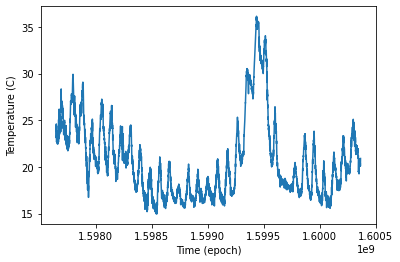

In [8]:
plt.plot(month_weather_data["deviceTime_unix"].values,month_weather_data["temperature"].values)
plt.xlabel("Time (epoch)")
plt.ylabel("Temperature (C)")
plt.show()

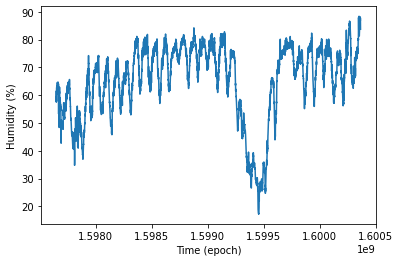

In [22]:
plt.plot(month_weather_data["deviceTime_unix"].values,month_weather_data["humidity"].values)
plt.xlabel("Time (epoch)")
plt.ylabel("Humidity (%)")
plt.show()

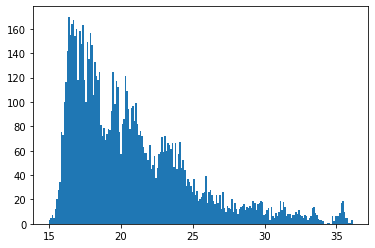

In [10]:
plt.hist(month_weather_data["temperature"].values,bins=200)
plt.show()

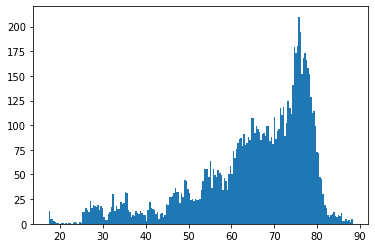

In [11]:
plt.hist(month_weather_data["humidity"].values,bins=200)
plt.show()

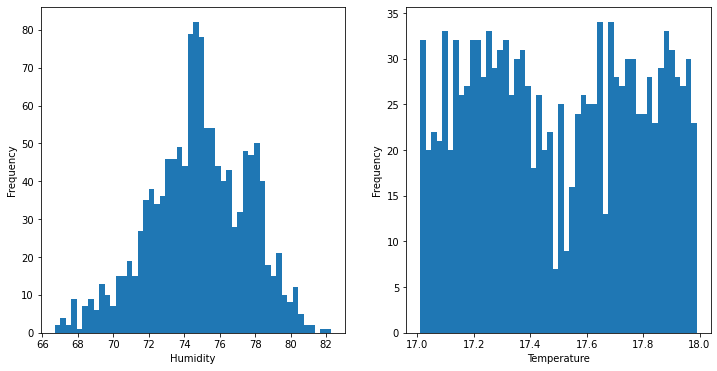

In [12]:
t_low = 17
t_high = 18
cut_data = month_weather_data[(month_weather_data['temperature']>t_low) & (month_weather_data['temperature']<t_high)]

fig1 = plt.figure(1, figsize=(12,6))
ax1 = fig1.add_subplot(121)
ax2 = fig1.add_subplot(122)

ax1.hist(cut_data["humidity"].values,bins=50)
ax1.set_xlabel("Humidity")
ax1.set_ylabel("Frequency")
ax2.hist(cut_data["temperature"].values,bins=50)
ax2.set_xlabel("Temperature")
ax2.set_ylabel("Frequency")

plt.show()

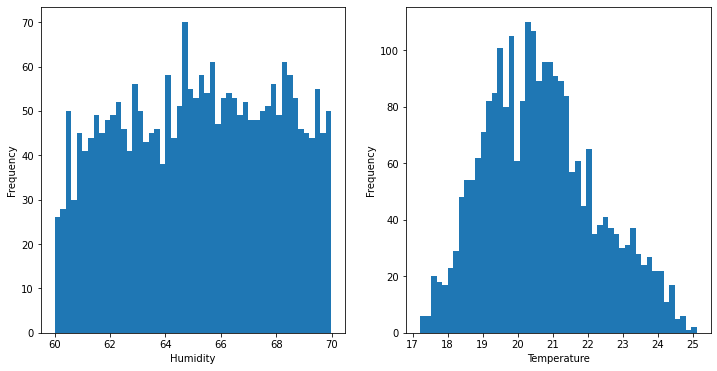

In [13]:
h_low = 60
h_high = 70
cut_data = month_weather_data[(month_weather_data['humidity']>h_low) & (month_weather_data['humidity']<h_high)]

fig1 = plt.figure(1, figsize=(12,6))
ax1 = fig1.add_subplot(121)
ax2 = fig1.add_subplot(122)

ax1.hist(cut_data["humidity"].values,bins=50)
ax1.set_xlabel("Humidity")
ax1.set_ylabel("Frequency")
ax2.hist(cut_data["temperature"].values,bins=50)
ax2.set_xlabel("Temperature")
ax2.set_ylabel("Frequency")

plt.show()

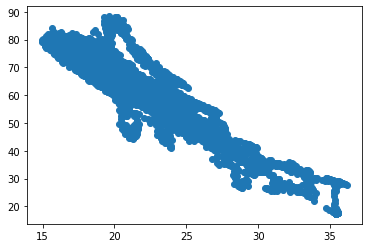

In [16]:
plt.scatter(month_weather_data["temperature"].values,month_weather_data["humidity"].values)
plt.show()

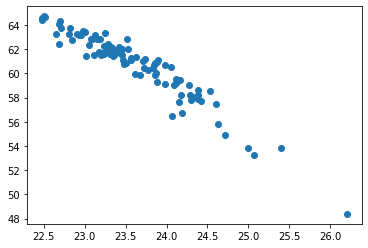

In [17]:
plt.scatter(month_weather_data["temperature"].values[:100],month_weather_data["humidity"].values[:100])
plt.show()

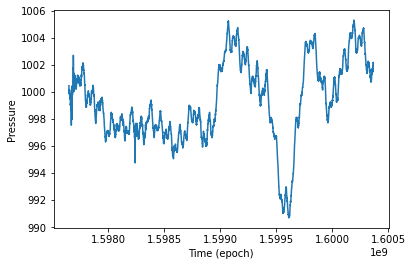

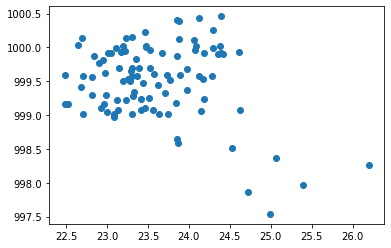

In [20]:
plt.plot(month_weather_data["deviceTime_unix"].values,month_weather_data["pressure"].values)
plt.xlabel("Time (epoch)")
plt.ylabel("Pressure")
plt.show()

plt.scatter(month_weather_data["temperature"].values[:100],month_weather_data["pressure"].values[:100])
plt.show()

In [29]:
import scipy.stats

In [30]:
scipy.stats.pearsonr(month_weather_data["humidity"].values, 
                     month_weather_data["temperature"].values)

(-0.9375388818699399, 0.0)

In [31]:
scipy.stats.pearsonr(month_weather_data["pressure"].values, 
                     month_weather_data["temperature"].values)

(-0.15099981940982238, 2.57519496254082e-47)

In [40]:
import random

In [42]:
temp_random = month_weather_data["temperature"].values
print(temp_random)
random.shuffle(temp_random)
print(temp_random)

[24.39 24.3  23.88 ... 20.59 20.86 20.91]
[16.48 19.97 20.15 ... 22.28 16.23 17.38]


In [43]:
h_random = month_weather_data["humidity"].values
print(h_random)
random.shuffle(h_random)
print(h_random)

[57.85 57.83 59.31 ... 85.57 84.54 83.69]
[55.26 67.06 71.95 ... 78.89 27.68 54.56]


In [44]:
scipy.stats.pearsonr(h_random,temp_random)

(0.019185047476700984, 0.06795267687979147)

In [27]:
filename = r"C:/Users/ahanks/Downloads/etch_roof_d3s.csv"
data_d3s = get_local_data(filename)

In [35]:
time_mask = data['deviceTime_local']>'2020-08-17 00:00:00-07:00'
month_data = data[time_mask]
month_data

,deviceTime_utc,deviceTime_local,deviceTime_unix,cpm,cpmError,error_flag
321523,2020-08-17 07:00:51+0000,2020-08-17 00:00:51-0700,1.597648e+09,2.0,0.632456,0.0
321524,2020-08-17 07:05:51+0000,2020-08-17 00:05:51-0700,1.597648e+09,3.4,0.824621,0.0
321525,2020-08-17 07:10:51+0000,2020-08-17 00:10:51-0700,1.597648e+09,2.8,0.748331,0.0
321526,2020-08-17 07:15:51+0000,2020-08-17 00:15:51-0700,1.597649e+09,1.8,0.600000,0.0
321527,2020-08-17 07:20:51+0000,2020-08-17 00:20:51-0700,1.597649e+09,3.0,0.774597,0.0
...,...,...,...,...,...,...
330539,2020-09-17 17:30:42+0000,2020-09-17 10:30:42-0700,1.600364e+09,3.8,0.871780,0.0
330540,2020-09-17 17:35:42+0000,2020-09-17 10:35:42-0700,1.600364e+09,3.4,0.824621,0.0
330541,2020-09-17 17:40:42+0000,2020-09-17 10:40:42-0700,1.600364e+09,2.0,0.632456,0.0
330542,2020-09-17 17:45:42+0000,2020-09-17 10:45:42-0700,1.600365e+09,2.6,0.721110,0.0


In [36]:
time_mask = data_d3s['deviceTime_local']>'2020-08-17 00:00:00-07:00'
month_data_d3s = data_d3s[time_mask]
month_data_d3s

,deviceTime_utc,deviceTime_local,deviceTime_unix,cpm,cpmError,keV_per_ch,0,1,2,3,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,error_flag
200809,2020-08-17 07:01:09+0000,2020-08-17 00:01:09-0700,1.597648e+09,2323.6,21.557365,2.57,0,0,0,0,...,0,0,0,0,0,1,0,0,72,0.0
200810,2020-08-17 07:06:09+0000,2020-08-17 00:06:09-0700,1.597648e+09,2335.4,21.612034,2.57,0,0,0,0,...,0,0,0,0,0,1,0,0,67,0.0
200811,2020-08-17 07:11:09+0000,2020-08-17 00:11:09-0700,1.597648e+09,2320.8,21.544373,2.57,0,0,0,0,...,0,0,0,0,0,0,0,0,63,0.0
200812,2020-08-17 07:16:09+0000,2020-08-17 00:16:09-0700,1.597649e+09,2260.6,21.263114,2.57,0,0,0,0,...,0,0,0,0,0,0,0,0,56,0.0
200813,2020-08-17 07:21:09+0000,2020-08-17 00:21:09-0700,1.597649e+09,2274.8,21.329791,2.57,0,0,0,0,...,0,0,0,0,0,0,0,0,72,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209875,2020-09-17 18:52:16+0000,2020-09-17 11:52:16-0700,1.600369e+09,2301.4,21.454137,2.57,0,0,0,0,...,0,0,0,0,0,0,0,0,74,0.0
209876,2020-09-17 18:57:16+0000,2020-09-17 11:57:16-0700,1.600369e+09,2332.0,21.596296,2.57,0,0,0,0,...,0,0,0,0,0,0,0,0,72,0.0
209877,2020-09-17 19:02:16+0000,2020-09-17 12:02:16-0700,1.600369e+09,2310.0,21.494185,2.57,0,0,0,0,...,0,0,0,0,0,1,0,0,73,0.0
209878,2020-09-17 19:07:16+0000,2020-09-17 12:07:16-0700,1.600370e+09,2316.4,21.523940,2.57,0,0,0,0,...,0,0,0,0,0,0,0,0,68,0.0


In [38]:
scipy.stats.pearsonr(month_data["cpm"].values, 
                     month_data_d3s["cpm"].values[:-50])

(0.07832615702853017, 9.351619920610551e-14)

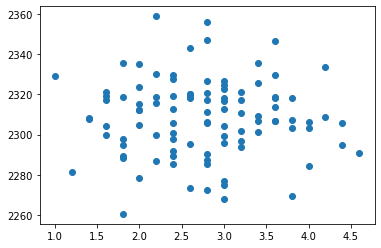

In [39]:
plt.scatter(month_data["cpm"].values[:100],month_data_d3s["cpm"].values[:100])
plt.show()